In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('HouseRent.csv')
df.head()

,Region,Charge for Service,Kind of Heating,Telekom Tv Promotion,Have a balcony?,Number of Pictures,Total Rent,House constructed Year,Number of Park Spaces,Firing Types,Has a kitchen?,House Condition,Pets Allowed?,Have a lift?,Type of Float,Number of rooms,Floor,Have a garden?,Heating Cost
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,6,840.0,1965.0,1.0,oil,False,well_kept,NaN,False,ground_floor,4.0,1.0,True,NaN
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,True,8,NaN,1871.0,2.0,gas,False,refurbished,no,False,ground_floor,3.0,NaN,False,NaN
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,8,1300.0,2019.0,1.0,NaN,False,first_time_use,NaN,True,apartment,3.0,3.0,False,NaN
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,True,9,NaN,1964.0,NaN,district_heating,False,NaN,NaN,False,other,3.0,3.0,False,87.23
4,Bremen,138.00,self_contained_central_heating,NaN,True,19,903.0,1950.0,NaN,gas,False,refurbished,NaN,False,apartment,3.0,1.0,False,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  268850 non-null  object 
 1   Charge for Service      261941 non-null  float64
 2   Kind of Heating         223994 non-null  object 
 3   Telekom Tv Promotion    236231 non-null  object 
 4   Have a balcony?         268850 non-null  bool   
 5   Number of Pictures      268850 non-null  int64  
 6   Total Rent              228333 non-null  float64
 7   House constructed Year  211805 non-null  float64
 8   Number of Park Spaces   93052 non-null   float64
 9   Firing Types            211886 non-null  object 
 10  Has a kitchen?          268850 non-null  bool   
 11  House Condition         200361 non-null  object 
 12  Pets Allowed?           154277 non-null  object 
 13  Have a lift?            268850 non-null  bool   
 14  Type of Float       

In [5]:
df.describe()

,Charge for Service,Number of Pictures,Total Rent,House constructed Year,Number of Park Spaces,Number of rooms,Floor,Heating Cost
count,261941.000000,268850.000000,2.283330e+05,211805.000000,93052.000000,268850.000000,217541.000000,85518.000000
mean,151.206113,9.791958,9.013315e+02,1966.400590,1.327634,2.641261,2.122405,76.990866
std,308.295790,6.408399,3.323833e+04,46.992207,8.361403,2.633440,3.634934,147.716278
min,0.000000,0.000000,0.000000e+00,1000.000000,0.000000,1.000000,-1.000000,0.000000
25%,95.000000,6.000000,4.698000e+02,1950.000000,1.000000,2.000000,1.000000,54.000000
50%,135.000000,9.000000,6.500000e+02,1973.000000,1.000000,3.000000,2.000000,70.000000
75%,190.000000,13.000000,9.850000e+02,1996.000000,1.000000,3.000000,3.000000,90.000000
max,146118.000000,121.000000,1.575154e+07,2090.000000,2241.000000,999.990000,999.000000,12613.000000


In [7]:
df.isnull().sum()

#as shown below, there are too much missing values in the dataset

Region                         0
Charge for Service          6909
Kind of Heating            44856
Telekom Tv Promotion       32619
Have a balcony?                0
Number of Pictures             0
Total Rent                 40517
House constructed Year     57045
Number of Park Spaces     175798
Firing Types               56964
Has a kitchen?                 0
House Condition            68489
Pets Allowed?             114573
Have a lift?                   0
Type of Float              36614
Number of rooms                0
Floor                      51309
Have a garden?                 0
Heating Cost              183332
dtype: int64

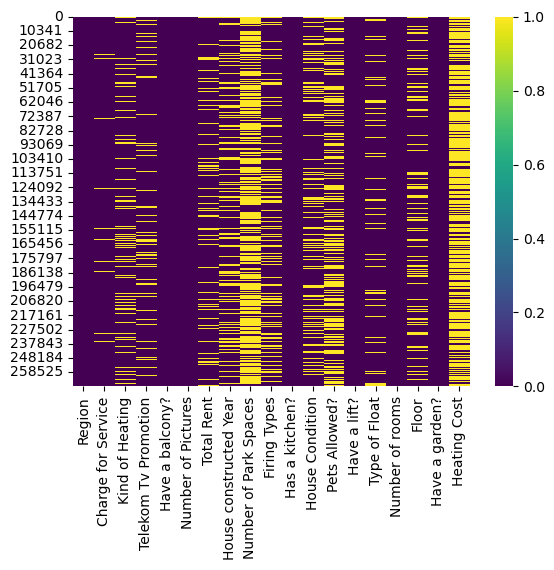

In [9]:
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

In [11]:
#filling some of the null values with the mean of the column, and dropping some of the columns that contain too much null values.

In [13]:
df['Charge for Service'].fillna(df['Charge for Service'].mean(),inplace=True)

In [15]:
df.drop(['Kind of Heating','Telekom Tv Promotion','Firing Types','House Condition','Pets Allowed?','House constructed Year','Type of Float'],axis=1,inplace=True)

In [17]:
df['Total Rent'].fillna(df['Total Rent'].mean(),inplace=True)

In [19]:
df['Number of Park Spaces'].fillna(df['Number of Park Spaces'].mean(),inplace=True)

In [21]:
df['Floor'].fillna(df['Floor'].mean(),inplace=True)

In [23]:
df['Heating Cost'].fillna(df['Heating Cost'].mean(),inplace=True)

In [25]:
df.isnull().sum()

#handled all the missing values

Region                   0
Charge for Service       0
Have a balcony?          0
Number of Pictures       0
Total Rent               0
Number of Park Spaces    0
Has a kitchen?           0
Have a lift?             0
Number of rooms          0
Floor                    0
Have a garden?           0
Heating Cost             0
dtype: int64

In [27]:
df

,Region,Charge for Service,Have a balcony?,Number of Pictures,Total Rent,Number of Park Spaces,Has a kitchen?,Have a lift?,Number of rooms,Floor,Have a garden?,Heating Cost
0,Nordrhein_Westfalen,245.00,False,6,840.000000,1.000000,False,False,4.0,1.000000,True,76.990866
1,Rheinland_Pfalz,134.00,True,8,901.331522,2.000000,False,False,3.0,2.122405,False,76.990866
2,Sachsen,255.00,True,8,1300.000000,1.000000,False,True,3.0,3.000000,False,76.990866
3,Sachsen,58.15,True,9,901.331522,1.327634,False,False,3.0,3.000000,False,87.230000
4,Bremen,138.00,True,19,903.000000,1.327634,False,False,3.0,1.000000,False,76.990866
...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,True,0,910.000000,1.000000,False,False,3.0,2.122405,False,76.990866
268846,Hessen,220.00,True,12,1150.000000,1.000000,True,False,3.5,1.000000,False,76.990866
268847,Hessen,220.00,True,21,930.000000,1.000000,False,False,4.0,1.000000,True,76.990866
268848,Nordrhein_Westfalen,175.00,True,16,1015.000000,1.000000,False,True,2.0,2.122405,False,40.000000


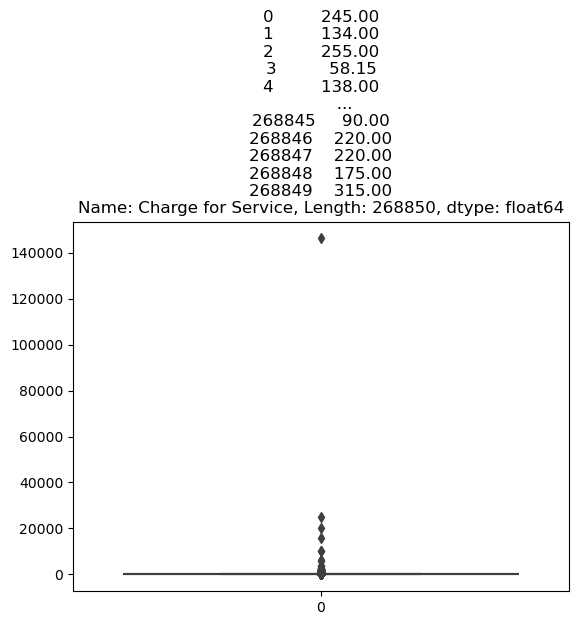

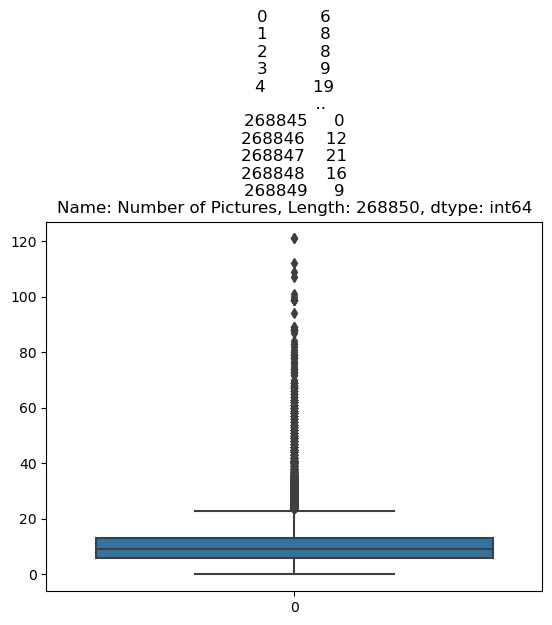

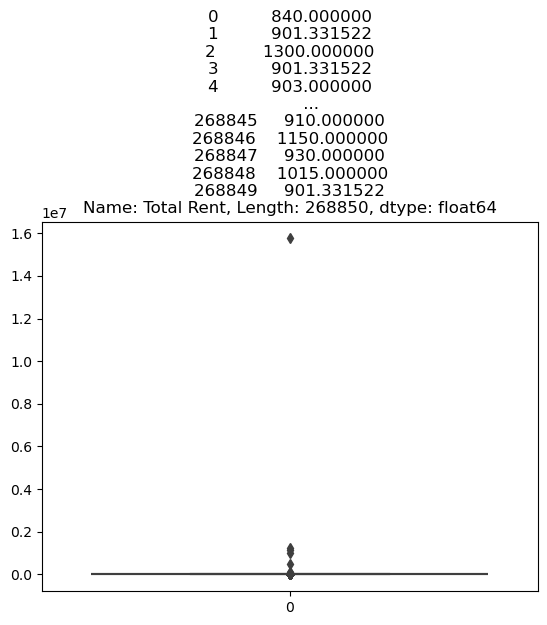

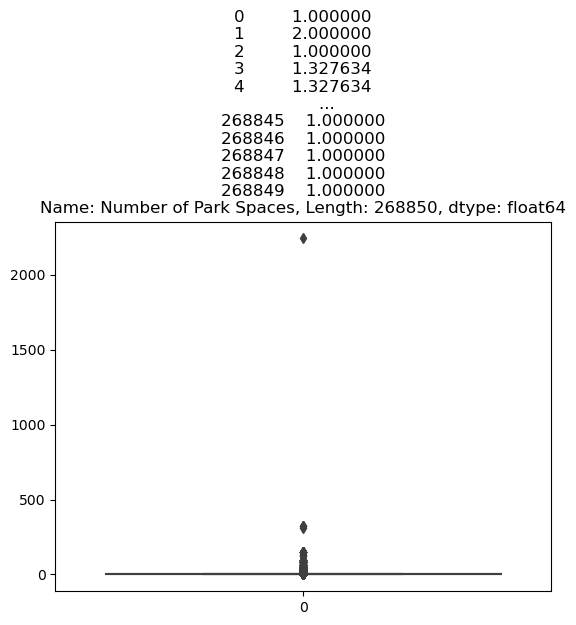

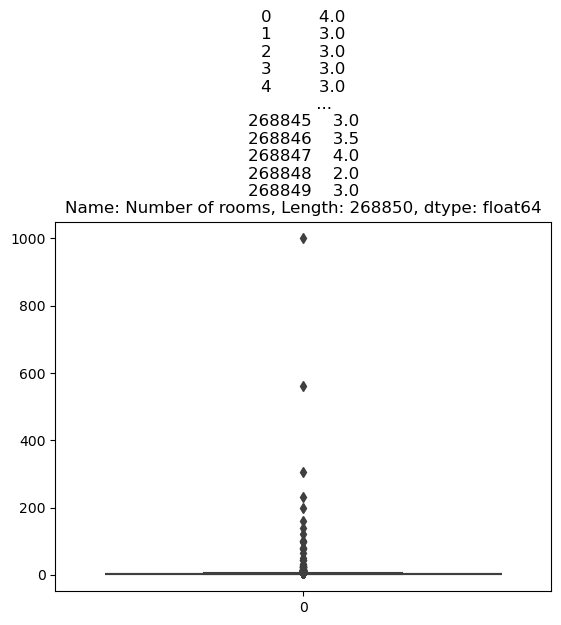

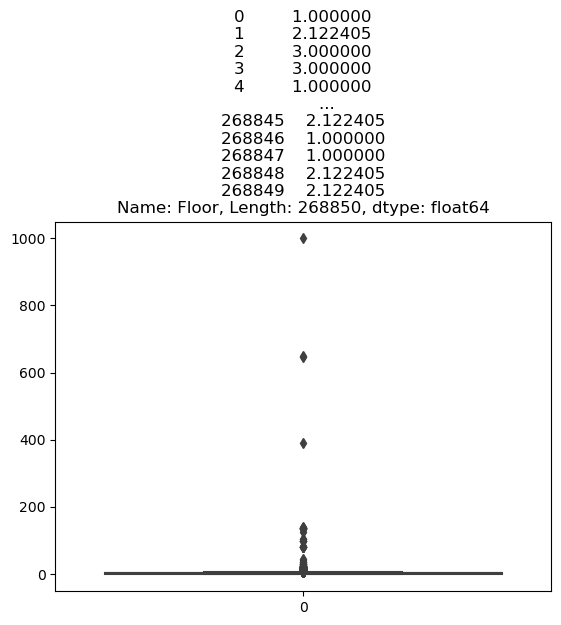

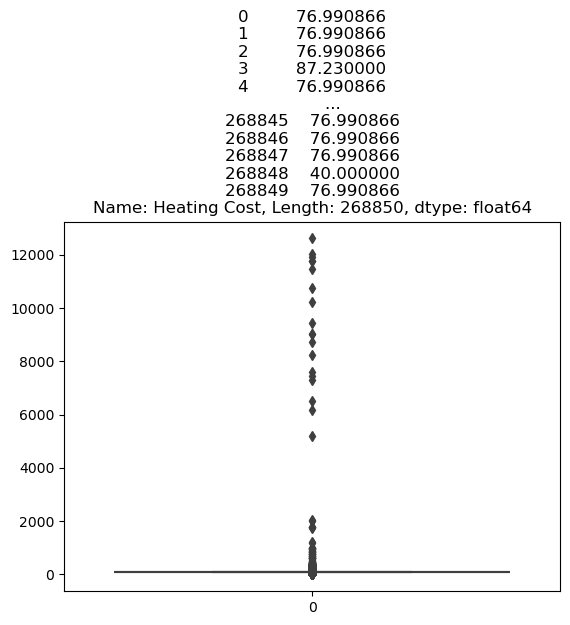

In [29]:
#detecting outliers in numeric columns
for i in df.select_dtypes(include='number'):
    sns.boxplot(df[i])
    plt.title(df[i])
    plt.show()

#there are considerable outliers in most of the columns

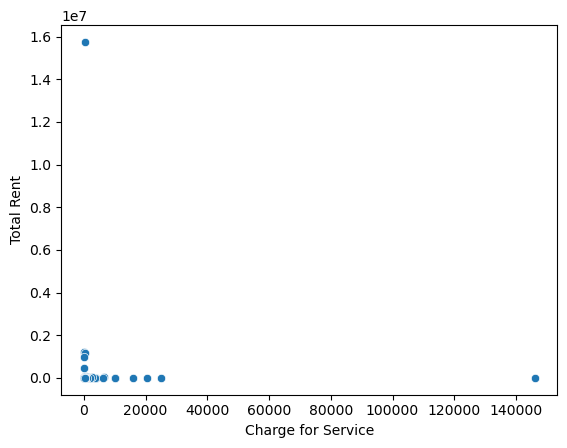

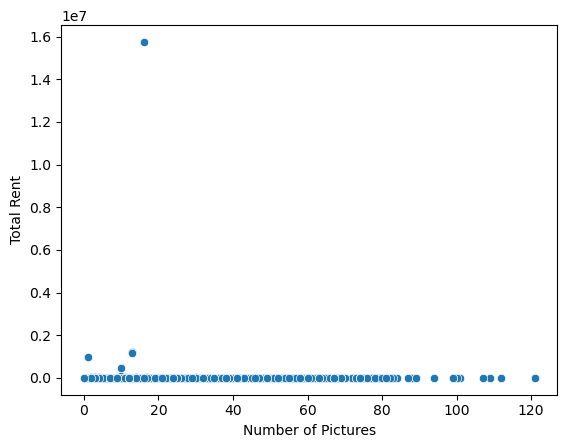

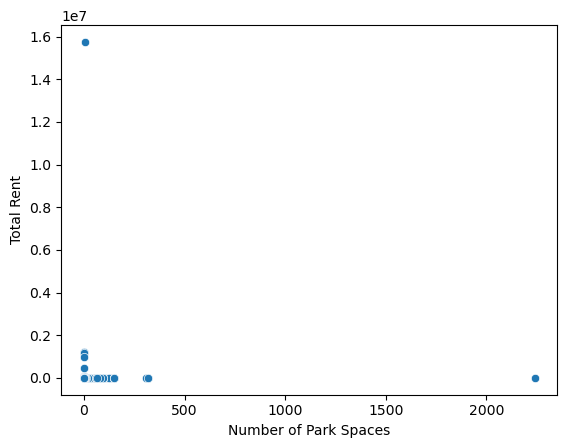

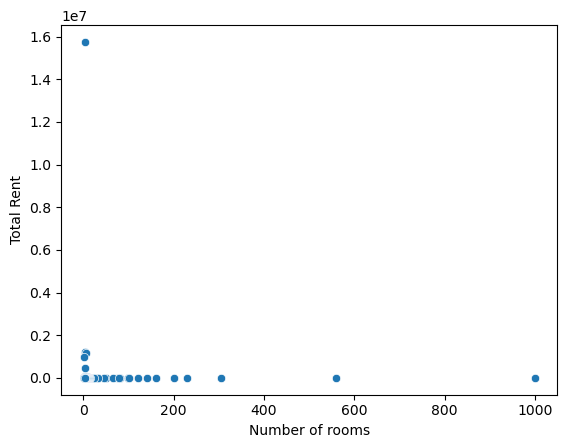

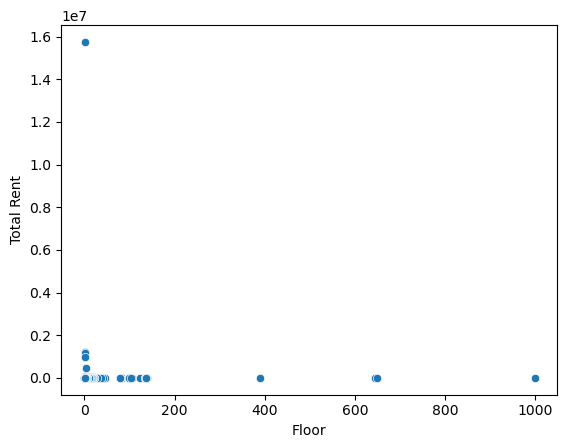

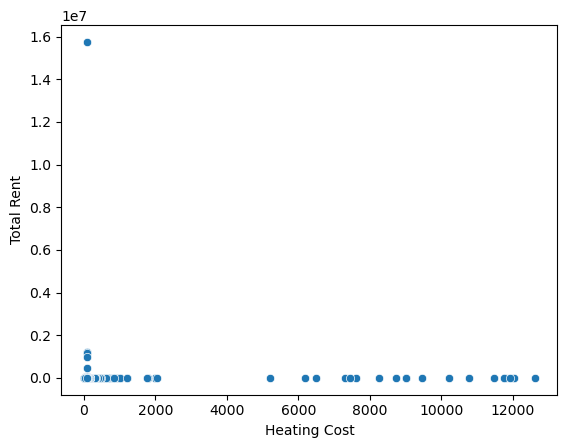

In [30]:
numeric=df[['Charge for Service','Number of Pictures','Number of Park Spaces','Number of rooms','Floor','Heating Cost']]

for i in numeric:
    sns.scatterplot(x=df[i],y=df['Total Rent'])
    plt.show()

#showing relationships between different columns and the target column Total Rent

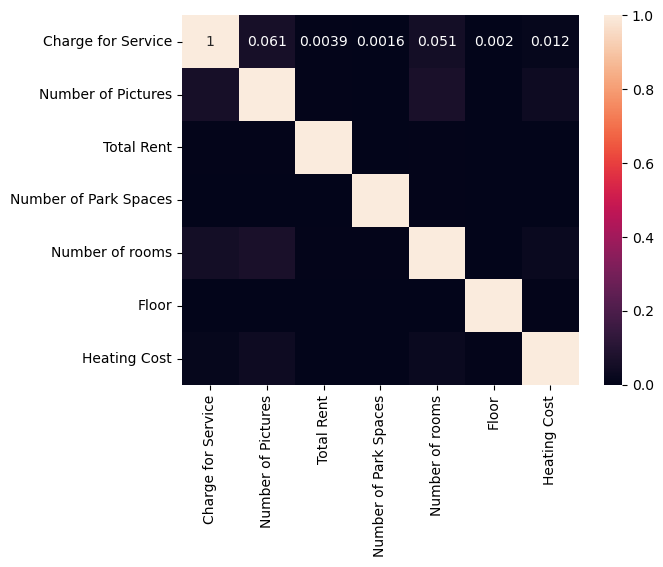

In [32]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

#correlation is very low between columns

In [35]:
X=df['Charge for Service']
y=df['Total Rent']

In [37]:
from sklearn.model_selection import train_test_split

#splitting our variable into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size = 0.7, test_size = 0.3,random_state = 100)

In [39]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_train_sm

,const,Charge for Service
231986,1.0,80.00
266781,1.0,305.00
122404,1.0,50.00
21621,1.0,290.00
119425,1.0,112.96
...,...,...
212912,1.0,97.00
65615,1.0,150.00
253799,1.0,200.00
210755,1.0,60.00


In [41]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

#the intercept is 887.743606 and the slope is 0.299840

const                 887.743606
Charge for Service      0.299840
dtype: float64

In [43]:
lr.summary()

#coefficient of Charge for Service is 0.2998
#R squared value is very low means model is not performing well .

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Total Rent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.630
Date:                Fri, 02 Aug 2024   Prob (F-statistic):              0.202
Time:                        20:36:54   Log-Likelihood:            -2.2446e+06
No. Observations:              188195   AIC:                         4.489e+06
Df Residuals:                  188193   BIC:                         4.489e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                887.7436     91.594      9.692      0.000     708.222    1067.265
Charge for Service     0.2998      0.235      1.277      0.202      -0.160       0.760
===============================================================================
Omnibus:                  1129379.442   Durbin-Watson:                    2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   259921455381087.531
Skew:                         423.634   Prob(JB):                          0.00
Kurtosis:                  182064.427   Cond. No.                          423.
===============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

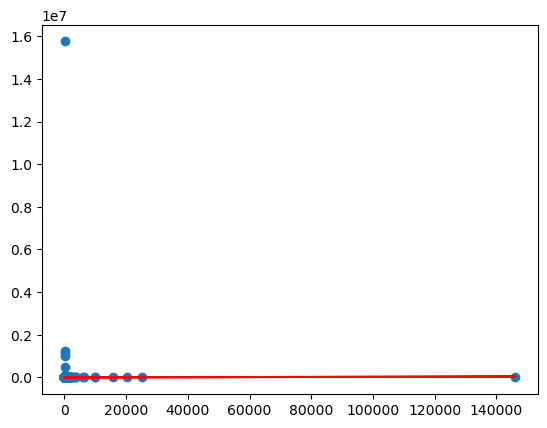

In [45]:
plt.scatter(X_train,y_train)
plt.plot(X_train,887.743+X_train*0.299,'r')
plt.show()

In [46]:
#Predictions on the Test Set
X_test_sm = sm.add_constant(X_test)

y_pred = lr.predict(X_test_sm)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#mean squared error
mse=np.sqrt(mean_squared_error(y_test,y_pred))
mse

518.9995477216836

In [51]:
#r-squared value
r2=r2_score(y_test,y_pred)
r2

#only 2% of the variance is explained by the model.

0.020649998669579173

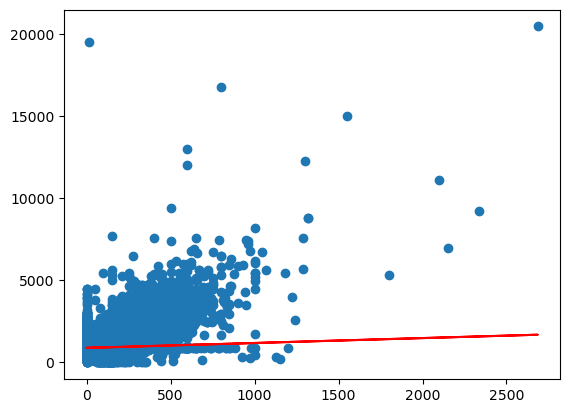

In [53]:
plt.scatter(X_test,y_test)
plt.plot(X_test,887.743+X_test*0.299,'r')
plt.show()